In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


### Preprocessing the data
##### Segmenting the age

In [7]:
def age_segment(value):
    if value <= 44:
        return 'young'
    elif value <= 59:
        return 'medium'
    else:
        return 'elderly'


df["Age Segment"] = df['Age'].apply(age_segment)

In [8]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Age Segment
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,elderly
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female,medium
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female,elderly
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female,elderly
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male,medium


<AxesSubplot:xlabel='Age Segment', ylabel='count'>

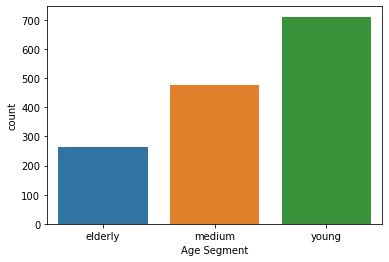

In [9]:
sns.countplot(x='Age Segment', data=df)

In [13]:
yes_count = 0


TypeError: 'Index' object is not callable

In [22]:
from sklearn.preprocessing import LabelEncoder

list_cols = ['yummy','convenient','spicy','fattening',
             'greasy','fast','cheap','tasty',
             'expensive','healthy','disgusting','Gender']
le = LabelEncoder()
df[list_cols] = df[list_cols].apply(le.fit_transform)

pca_columns = df[['yummy','convenient','spicy','fattening',
             'greasy','fast','cheap','tasty',
             'expensive','healthy','disgusting']]

df_pca = pca_columns.copy()
df_pca.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [23]:
from sklearn.decomposition  import PCA
x = df_pca.values
pca = PCA(n_components=2)
pca_components = pca.fit_transform(x)
pca_df = pd.DataFrame(data=pca_components,columns=['pca_1','pca_2'])

In [24]:
pca_df

,pca_1,pca_2
0,0.425367,-0.219079
1,-0.218638,0.388190
2,0.375415,0.730435
3,-0.172926,-0.352752
4,0.187057,-0.807610
...,...,...
1448,1.550242,0.275031
1449,-0.957339,0.014308
1450,-0.185894,1.062662
1451,-1.182064,-0.038570


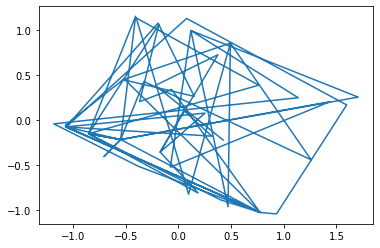

In [32]:

plt.plot(pca_df['pca_1'][:60],pca_df['pca_2'][:60])
plt.show()

In [33]:
df_1 = pd.concat([pca_df,df['Age Segment']],axis=1)

In [34]:
df_1

,pca_1,pca_2,Age Segment
0,0.425367,-0.219079,elderly
1,-0.218638,0.388190,medium
2,0.375415,0.730435,elderly
3,-0.172926,-0.352752,elderly
4,0.187057,-0.807610,medium
...,...,...,...
1448,1.550242,0.275031,medium
1449,-0.957339,0.014308,young
1450,-0.185894,1.062662,medium
1451,-1.182064,-0.038570,young


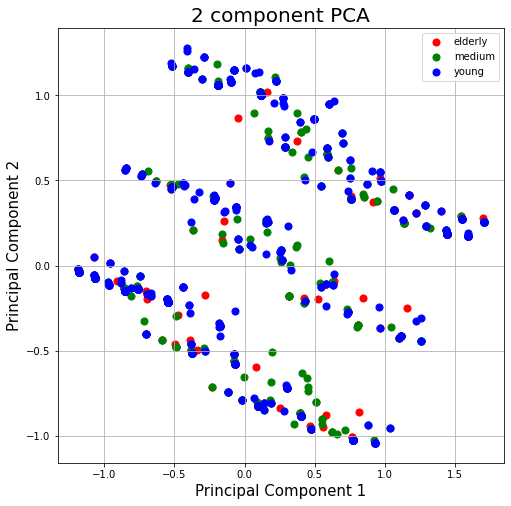

In [36]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['elderly','medium','young']
colors = ['r', 'g', 'b']


for target, color in zip(targets,colors):
    indicesToKeep = df_1['Age Segment'] == target
    ax.scatter(df_1.loc[indicesToKeep, 'pca_1']
               , df_1.loc[indicesToKeep, 'pca_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()